In [1]:
# Data downloaded from 10.5281/zenodo.13823014

'\nThis notebook generates the log L2 ref - alt plots for diQTLs (Fig. 3A).\nFor example track and DeepSHAP plots, please see the example tracks directory.\n'

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Load data

composite = np.log10(
    pd.read_csv(
        "/Users/adamhe/github/scratch/qtl_metrics/diqtl/diqtls_l2_scores_ref_model.csv.gz",
        index_col=0,
        header=None,
    ) 
    + 1e-3
)
composite.columns = ["expt", "pred"]
composite.shape

(1207, 2)

In [4]:
print((composite.pred == np.log10(1e-3)).mean())
print((composite.pred == np.log10(1e-3)).sum())

0.1996685998342999
241


In [17]:
print(pearsonr(composite.expt, composite.pred))

PearsonRResult(statistic=0.41878963554626597, pvalue=1.9016377358180086e-52)


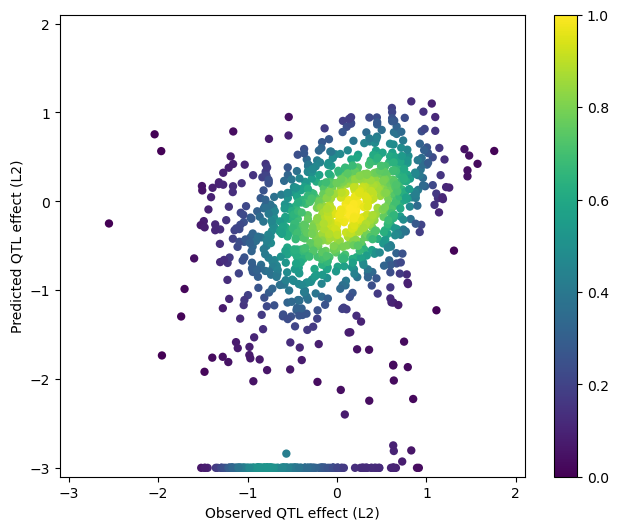

In [19]:
# Plot composite log L2 ref - alt scores

fig = plt.figure(figsize=(7.5, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=composite,
    x="expt",
    y="pred",
    c=gaussian_kde(composite.transpose())(composite.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3.1, 2.1)
ax.set_ylim(-3.1, 2.1)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)

# Add diagonal line
#xmin, xmax = ax.get_xlim()  # Get the current x-axis limits
#ymin, ymax = ax.get_ylim()  # Get the current y-axis limits
#lim = [min(xmin, ymin), max(xmax, ymax)]  # Ensure the line covers the full range
#ax.plot(x, , 'k--', lw=2)  # 'k--' is a black dashed line with linewidth=2

plt.savefig("img/diqtl_composite_l2.pdf")

In [20]:
print(pearsonr(composite.expt, composite.pred))
print(spearmanr(composite.expt, composite.pred))

PearsonRResult(statistic=0.41878963554626597, pvalue=1.9016377358180086e-52)
SignificanceResult(statistic=0.4623145134976247, pvalue=5.9633532316372395e-65)
